In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from commando import ComManDo
from commando.evaluation import test_partial
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

2022-02-23 00:33:07.397052: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-23 00:33:07.397083: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
data1 = np.loadtxt("../data/UnionCom/scGEM/GeneExpression.txt")
data2 = np.loadtxt("../data/UnionCom/scGEM/DNAmethylation.txt")
type1 = np.loadtxt("../data/UnionCom/scGEM/type1.txt")
type2 = np.loadtxt("../data/UnionCom/scGEM/type2.txt")
type1 = type1.astype(np.int)
type2 = type2.astype(np.int)
type_func = lambda x: {1:'BJ', 2:'d8', 3:'d16T+', 4:'d24T+', 5:'IPS'}[x]

# ComManDo Partial

use random seed: 666
Shape of Raw data
Dataset 0: (177, 34)
Dataset 1: (177, 27)
Device: cpu
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
epoch:[100/2000] err:3.6545 alpha:1.0122
epoch:[200/2000] err:2.9233 alpha:1.1805
epoch:[300/2000] err:2.0462 alpha:1.3132
epoch:[400/2000] err:1.6937 alpha:1.3747
epoch:[500/2000] err:1.5626 alpha:1.4014
epoch:[600/2000] err:1.5047 alpha:1.4145
epoch:[700/2000] err:1.4725 alpha:1.4224
epoch:[800/2000] err:1.4507 alpha:1.4282
epoch:[900/2000] err:1.4341 alpha:1.4329
epoch:[1000/2000] err:1.4207 alpha:1.4369
epoch:[1100/2000] err:1.4093 alpha:1.4405
epoch:[1200/2000] err:1.3993 alpha:1.4436
epoch:[1300/2000] err:1.3907 alpha:1.4463
epoch:[1400/2000] err:1.3833 alpha:1.4488
epoch:[1500/2000] err:1.3769 alpha:1.4510
epoch:[1600/2000] err:1.3714 alpha:1.4530
epoch:[1700/2000] err:1.3668 alpha:1.4549
epoch:[1800/2000] err:1.3629 alpha:1.4565
epoch:[1900/2000] err:1.3594 alpha:1.4580
epoch:[2000/2000] err:1.3564 alp

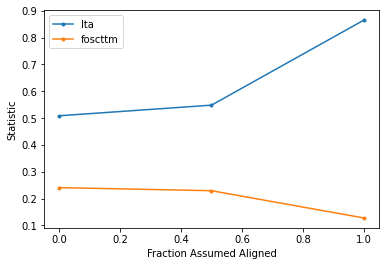

In [4]:
test_partial([data1,data2], [type1,type2]);

# ComManDo Aligned

In [5]:
cm = ComManDo()
cm_data = cm.fit_transform(dataset=[data1,data2])

use random seed: 666
Shape of Raw data
Dataset 0: (177, 34)
Dataset 1: (177, 27)
Device: cpu
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
epoch:[100/2000] err:3.6545 alpha:1.0122
epoch:[200/2000] err:2.9233 alpha:1.1805
epoch:[300/2000] err:2.0462 alpha:1.3132
epoch:[400/2000] err:1.6937 alpha:1.3747
epoch:[500/2000] err:1.5626 alpha:1.4014
epoch:[600/2000] err:1.5047 alpha:1.4145
epoch:[700/2000] err:1.4725 alpha:1.4224
epoch:[800/2000] err:1.4507 alpha:1.4282
epoch:[900/2000] err:1.4341 alpha:1.4329
epoch:[1000/2000] err:1.4207 alpha:1.4369
epoch:[1100/2000] err:1.4093 alpha:1.4405
epoch:[1200/2000] err:1.3993 alpha:1.4436
epoch:[1300/2000] err:1.3907 alpha:1.4463
epoch:[1400/2000] err:1.3833 alpha:1.4488
epoch:[1500/2000] err:1.3769 alpha:1.4510
epoch:[1600/2000] err:1.3714 alpha:1.4530
epoch:[1700/2000] err:1.3668 alpha:1.4549
epoch:[1800/2000] err:1.3629 alpha:1.4565
epoch:[1900/2000] err:1.3594 alpha:1.4580
epoch:[2000/2000] err:1.3564 alp

label transfer accuracy: 0.864406779661017
foscttm: 0.12788470745954228
Inter-label distances ([1, 2, 3, 4, 5]):
[[0.        0.6410741 2.224383  4.9900985 6.689048 ]
 [0.6410741 0.        2.0194747 5.082868  6.7861896]
 [2.224383  2.0194747 0.        3.6544816 5.5917087]
 [4.9900985 5.082868  3.6544816 0.        2.4387407]
 [6.689048  6.7861896 5.5917087 2.4387407 0.       ]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


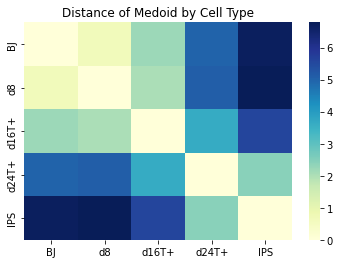

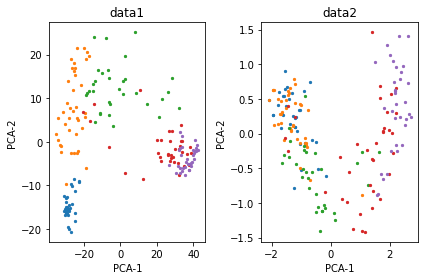

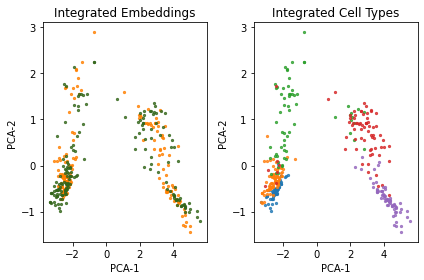

In [6]:
cm.test_LabelTA(cm_data, [type1,type2])
cm.test_closer(cm_data)
l,d = cm.test_label_dist(cm_data, [type1,type2])

l = [type_func(i) for i in l]
ax = sns.heatmap(d, xticklabels=l, yticklabels=l, linewidth=0, cmap='YlGnBu')
plt.title('Distance of Medoid by Cell Type')
cm.Visualize([data1,data2], cm_data, [type1,type2], mode='PCA')

# UnionCom Unaligned

In [7]:
uc = ComManDo(project_mode='tsne')
uc_data = uc.fit_transform(dataset=[data1,data2])

use random seed: 666
Shape of Raw data
Dataset 0: (177, 34)
Dataset 1: (177, 27)
Device: cpu
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
epoch:[100/2000] err:3.6545 alpha:1.0122
epoch:[200/2000] err:2.9233 alpha:1.1805
epoch:[300/2000] err:2.0462 alpha:1.3132
epoch:[400/2000] err:1.6937 alpha:1.3747
epoch:[500/2000] err:1.5626 alpha:1.4014
epoch:[600/2000] err:1.5047 alpha:1.4145
epoch:[700/2000] err:1.4725 alpha:1.4224
epoch:[800/2000] err:1.4507 alpha:1.4282
epoch:[900/2000] err:1.4341 alpha:1.4329
epoch:[1000/2000] err:1.4207 alpha:1.4369
epoch:[1100/2000] err:1.4093 alpha:1.4405
epoch:[1200/2000] err:1.3993 alpha:1.4436
epoch:[1300/2000] err:1.3907 alpha:1.4463
epoch:[1400/2000] err:1.3833 alpha:1.4488
epoch:[1500/2000] err:1.3769 alpha:1.4510
epoch:[1600/2000] err:1.3714 alpha:1.4530
epoch:[1700/2000] err:1.3668 alpha:1.4549
epoch:[1800/2000] err:1.3629 alpha:1.4565
epoch:[1900/2000] err:1.3594 alpha:1.4580
epoch:[2000/2000] err:1.3564 alp

label transfer accuracy: 0.5875706214689266
foscttm: 0.22262121357208975
Inter-label distances ([1, 2, 3, 4, 5]):
[[ 0.         1.9483118  5.1180897  9.938307  13.388063 ]
 [ 1.9483118  0.         3.6588676  8.630841  12.151797 ]
 [ 5.1180897  3.6588676  0.         5.0369654  8.58601  ]
 [ 9.938307   8.630841   5.0369654  0.         3.688288 ]
 [13.388063  12.151797   8.58601    3.688288   0.       ]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


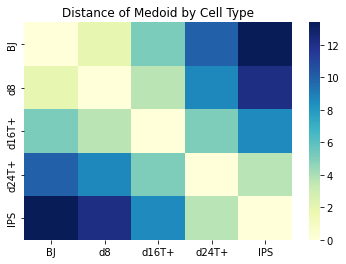

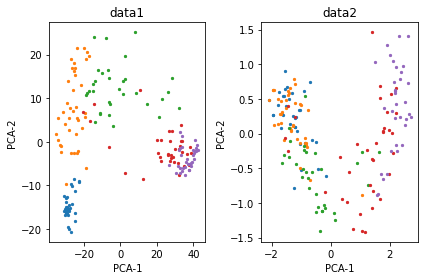

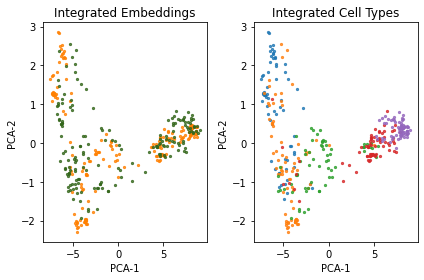

In [8]:
uc.test_LabelTA(uc_data, [type1,type2])
uc.test_closer(uc_data)
l,d = uc.test_label_dist(uc_data, [type1,type2])

l = [type_func(i) for i in l]
ax = sns.heatmap(d, xticklabels=l, yticklabels=l, linewidth=0, cmap='YlGnBu')
plt.title('Distance of Medoid by Cell Type')
uc.Visualize([data1,data2], uc_data, [type1,type2], mode='PCA')